# Music Genre Classification

# By :- Ravi Kumar Verma 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('music_genres.csv')
df.head()

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,1,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,2,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843071,18.620984,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,3,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,4,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,...,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
Unnamed: 0            1000 non-null int64
chroma_stft           1000 non-null float64
rmse                  1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12                1000 non-null float64
mfcc13                1000 non-null float64
mfcc14          

In [4]:
df.isnull().sum()

Unnamed: 0            0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0              int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [6]:
X = df.drop('label',1)
y = df['label'].copy()

In [7]:
X

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,1,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,2,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843071,18.620984,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,3,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,4,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,-43.945538,...,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,996,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,-33.497073,...,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,997,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443878,1.027332,...,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,998,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,...,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148


In [8]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [9]:
le = LabelEncoder()
le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 6)


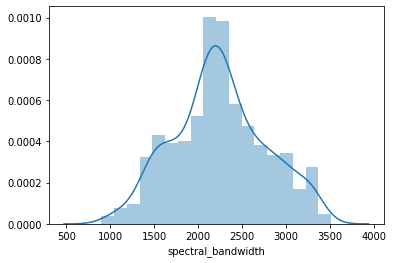

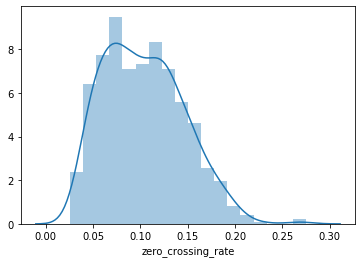

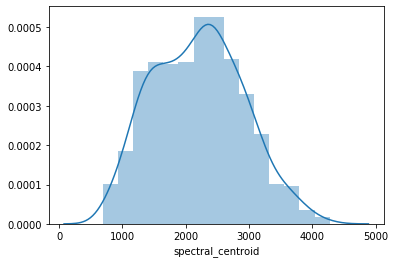

In [10]:
bandwidth = X_train['spectral_bandwidth']
sns.distplot(bandwidth)
plt.show()
zc_rate = X_train['zero_crossing_rate']
sns.distplot(zc_rate)
plt.show()
centroid = X_train['spectral_centroid']
sns.distplot(centroid)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [13]:
X_train

array([[ 0.04476453, -1.2330525 ,  0.46854568, ..., -0.55277989,
        -0.18175462, -0.08358891],
       [ 1.06596159,  1.34305   , -0.78603822, ...,  0.41837013,
        -1.16397931, -1.11077317],
       [-0.90027546, -0.06223292, -0.35029163, ..., -1.19773891,
        -0.31934811, -2.4073724 ],
       ...,
       [-0.94873905, -1.05868179, -0.20599527, ..., -2.29694683,
        -1.21728302, -2.42946806],
       [ 0.73363984,  0.84857552,  0.91155031, ...,  0.17802325,
         1.80788723,  0.73337976],
       [ 1.40174503, -0.23505687,  0.38505587, ..., -1.36215247,
        -0.08757679, -0.18183403]])

In [14]:
X_test

array([[ 1.65098635, -0.42871562, -0.39960497, ...,  0.28152295,
        -2.24138315,  0.15093197],
       [-1.65838447, -0.46015061, -0.55061729, ..., -0.06192901,
         0.51831428,  0.43781643],
       [ 1.41213009,  0.2963175 , -0.80624933, ..., -0.22091718,
        -0.02530013, -0.8593201 ],
       ...,
       [-0.7756548 , -0.30364415,  0.31776232, ...,  1.14995839,
        -0.2100278 , -0.58837101],
       [-0.03139254,  1.01922503, -0.33507654, ..., -0.18326684,
         0.42191537,  0.27766809],
       [ 1.28058606,  1.11681867, -1.05260268, ...,  0.44428609,
         0.84358292,  0.64277663]])

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [16]:
y_pred_lr

array(['rock', 'blues', 'reggae', 'disco', 'hiphop', 'pop', 'country',
       'rock', 'country', 'country', 'metal', 'blues', 'country',
       'reggae', 'reggae', 'blues', 'jazz', 'country', 'blues', 'country',
       'jazz', 'classical', 'hiphop', 'metal', 'pop', 'reggae', 'disco',
       'disco', 'hiphop', 'blues', 'reggae', 'disco', 'blues', 'jazz',
       'blues', 'blues', 'classical', 'country', 'pop', 'hiphop', 'pop',
       'pop', 'reggae', 'pop', 'reggae', 'blues', 'rock', 'country',
       'rock', 'pop', 'metal', 'country', 'reggae', 'classical', 'hiphop',
       'classical', 'classical', 'classical', 'classical', 'classical',
       'disco', 'rock', 'disco', 'country', 'country', 'blues', 'hiphop',
       'classical', 'metal', 'jazz', 'classical', 'pop', 'disco',
       'classical', 'hiphop', 'rock', 'metal', 'rock', 'classical',
       'rock', 'blues', 'blues', 'rock', 'reggae', 'jazz', 'reggae',
       'hiphop', 'classical', 'classical', 'disco', 'country', 'jazz',
       

In [17]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy LR: ",accuracy_lr)

Accuracy LR:  0.8433333333333334


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
sc = SVC()
sc.fit(X_train,y_train)
y_pred_sc = sc.predict(X_test)

accuracy_sc = accuracy_score(y_test,y_pred_sc)
print("Accuracy SC: ",accuracy_sc)

Accuracy SC:  0.8366666666666667


In [20]:
rf = RandomForestClassifier(random_state =9)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Accuracy RF: ",accuracy_rf)

Accuracy RF:  0.9233333333333333


In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)
voting_clf_soft = VotingClassifier(estimators=[('lr',lr),('rf',rf),('nv',nv)],voting='soft')

voting_clf_soft.fit(X_train,y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test,y_pred_soft)
print("Accuracy Score: ",accuracy_soft)

Accuracy Score:  0.8933333333333333


In [24]:
y.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

# Accuracy using different classifier


# RandomForestClassifier - 92.33%
# VotingClassifier - 89.33%
# LogisticRegression - 84.33%